In [1]:
import mesaPlot as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
home = "C:\\Users\\KNL\\Documents\\UvA\\Stellar Structure and Evolution\\MESA assignment\\Question 2\\"
def file_loc(ext):
    '''Find the location of the data files
    from the home folder return the history.data file

    input:
    ext: str folder where history.data file is located
    variables:
    file_loc: str file path
    data.loadHistory: list load the data form file_loc

    return 
    data
    '''
    file_loc = home + ext
    data = mp.MESA()
    data.loadHistory(f=file_loc)
    return data

#grab all the data from files for each star
M1sol = 'LOGS_1solMass'
M3sol = 'LOGS_3solMass'
M5sol = 'LOGS_5solMass'
M9sol = 'LOGS_9solMass'
M12sol = 'LOGS_12solMass'
data_M1sol = file_loc(M1sol)
data_M3sol = file_loc(M3sol)
data_M5sol = file_loc(M5sol)
data_M9sol = file_loc(M9sol)
data_M12sol = file_loc(M12sol)

# syarief = "syarief_LOGS"
# syarief_data = file_loc(syarief)
def get_data(datfile):
    '''Extract the data you want to a pandas DataFrame'''

    wanted_columns = ["log_Teff", "log_L","center_h1",'log_Lnuc']

    wanted_data = np.array([datfile.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
    df_star = pd.DataFrame(wanted_data, columns = wanted_columns)
    Teff = df_star["log_Teff"]
    Lum = df_star["log_L"]
    center_h1 = df_star["center_h1"]
    lnuc = df_star['log_Lnuc']
    return Teff, Lum, center_h1, lnuc
Teff1, Lum1, h1_1, lnuc_1  = get_data(data_M1sol)
#FIX FIX FIX

Teff3, Lum3, h1_3, lnuc3 = get_data(data_M3sol)
Teff5, Lum5, h1_5, lnuc5 = get_data(data_M5sol)
Teff9, Lum9, h1_9, lnuc9 = get_data(data_M9sol)
Teff12, Lum12, h1_12, lnuc12 = get_data(data_M12sol)

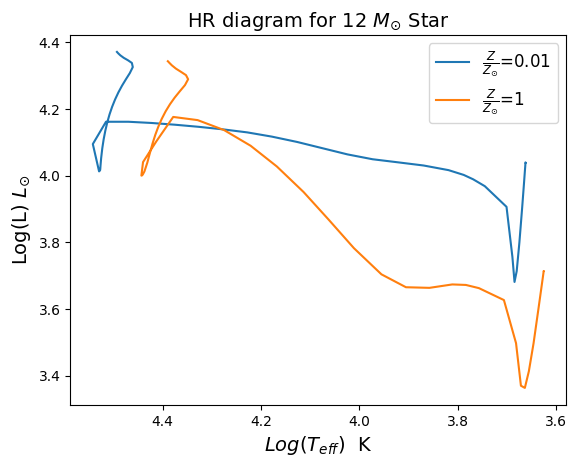

In [3]:
#Metalicity Question
M12_z = "LOGS_12_solMass_Z001"
data_z = file_loc(M12_z)
Zlabel = "$\\frac{Z}{Z_{\odot}}$"
#get data 
TeffZ, LumZ, h1_z, lnuc_z = get_data(data_z)
plt.plot(TeffZ, LumZ, label  =Zlabel+ '=0.01')#'$\frac{Z}{Z_{\odot}} = 0.01$')
plt.plot(Teff12, Lum12, label =Zlabel+'=1')
plt.xlabel("$Log(T_{eff})$  K ", fontsize=14)
plt.ylabel("Log(L) $L_{\odot}$", fontsize=14)
plt.title("HR diagram for 12 $M_{\odot}$ Star", fontsize=14)
plt.gca().invert_xaxis()
plt.legend(fontsize=12)
plt.savefig('M12DiffZ.png')
plt.show()

In [36]:
M_He = 'LOGS_Helium'
data_He = file_loc(M_He)
def get_Helium(datfile):
    '''Extract the data you want to a pandas DataFrame'''

    wanted_columns = ["log_Teff", "he_core_mass"]

    wanted_data = np.array([datfile.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
    df_star = pd.DataFrame(wanted_data, columns = wanted_columns)
    Teff = df_star["log_Teff"]
    He4 = df_star["he_core_mass"]
    return Teff, He4

myT, myHe = get_Helium(data_He)

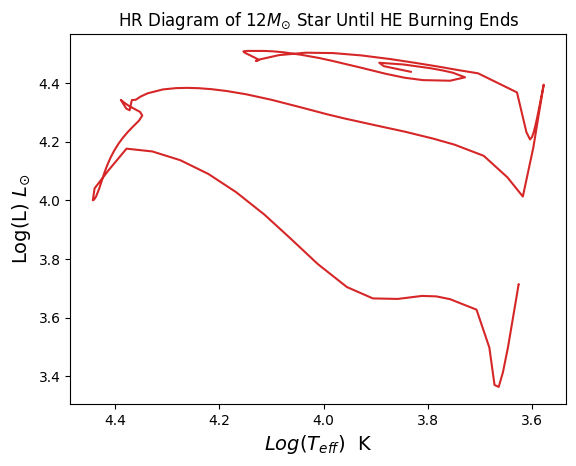

In [48]:
#helium endpoint plot
# plt.plot(myT, myHe, label='Core helium')
# N = len(myT)
# plt.scatter(myT[N-1], myHe[N-1], color='tab:blue')


plt.title("HR Diagram of 12$M_{\odot}$ Star Until HE Burning Ends")
plt.xlabel("$Log(T_{eff})$  K ", fontsize=14)
plt.ylabel("Log(L) $L_{\odot}$", fontsize=14)
plt.plot(TeffHe, LumHe, color="tab:red")
plt.gca().invert_xaxis()
plt.savefig("Q2_4.png")
plt.show()

In [35]:
tempt, tempHe = myHe[0], myHe[1]
tempt = np.array(tempt)

C:\Users\KNL\Documents\UvA\Stellar Structure and Evolution\MESA assignment\Question 2\
Hydrgen burning, end of hook
look at L nuclear burning